In [1]:
import torch
import torch.nn as nn
import pprint
pp = pprint.PrettyPrinter()

In [2]:
list_of_list = [
    [1, 2, 3],
    [4, 5, 6]
]
print(list_of_list)

[[1, 2, 3], [4, 5, 6]]


In [3]:
data = torch.tensor(list_of_list)
print(data)

tensor([[1, 2, 3],
        [4, 5, 6]])


In [5]:
data = torch.tensor([
    [0, 1],
    [2, 3],
    [4, 5]
])
print(data)

tensor([[0, 1],
        [2, 3],
        [4, 5]])


In [6]:
data = torch.tensor([
    [0, 1],
    [2, 3],
    [4, 5]
], dtype=torch.float32)
print(data)

tensor([[0., 1.],
        [2., 3.],
        [4., 5.]])


In [7]:
zeros = torch.zeros(2, 5)
print(zeros)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])


In [8]:
ones = torch.ones(2, 5)
print(ones)

tensor([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]])


In [10]:
a = torch.tensor([[1, 2], [3, 4] ,[4, 5]])
b = torch.tensor([[1, 2, 3, 4], [5, 6, 7, 8]])

print('A is', a)
print('B is', b)
print('The product is', a.matmul(b))
print('The other product is', a @ b)

A is tensor([[1, 2],
        [3, 4],
        [4, 5]])
B is tensor([[1, 2, 3, 4],
        [5, 6, 7, 8]])
The product is tensor([[11, 14, 17, 20],
        [23, 30, 37, 44],
        [29, 38, 47, 56]])
The other product is tensor([[11, 14, 17, 20],
        [23, 30, 37, 44],
        [29, 38, 47, 56]])


In [11]:
matr_2d = torch.tensor([[1,2], [3, 4]])
print(matr_2d.shape)

torch.Size([2, 2])


In [13]:
x = torch.tensor([2.], requires_grad=True)
pp.pprint(x.grad)

None


In [15]:
y = x * x * 3
y.backward()
pp.pprint(x.grad)

tensor([12.])


/home/kirill/Документы/Project/NLP_cource/venv/lib/python3.12/site-packages/torch/autograd/graph.py:841: UserWarning: CUDA initialization: Unexpected error from cudaGetDeviceCount(). Did you run some cuda functions before calling NumCudaDevices() that might have already set an error? Error 804: forward compatibility was attempted on non supported HW (Triggered internally at /pytorch/c10/cuda/CUDAFunctions.cpp:119.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


In [16]:
z = x * x * 3
z.backward()
pp.pprint(x.grad)

tensor([24.])


In [17]:
x.grad = None
z = x * x * 3
z.backward()
pp.pprint(x.grad)

tensor([12.])


In [18]:
import torch.nn as nn
import torch

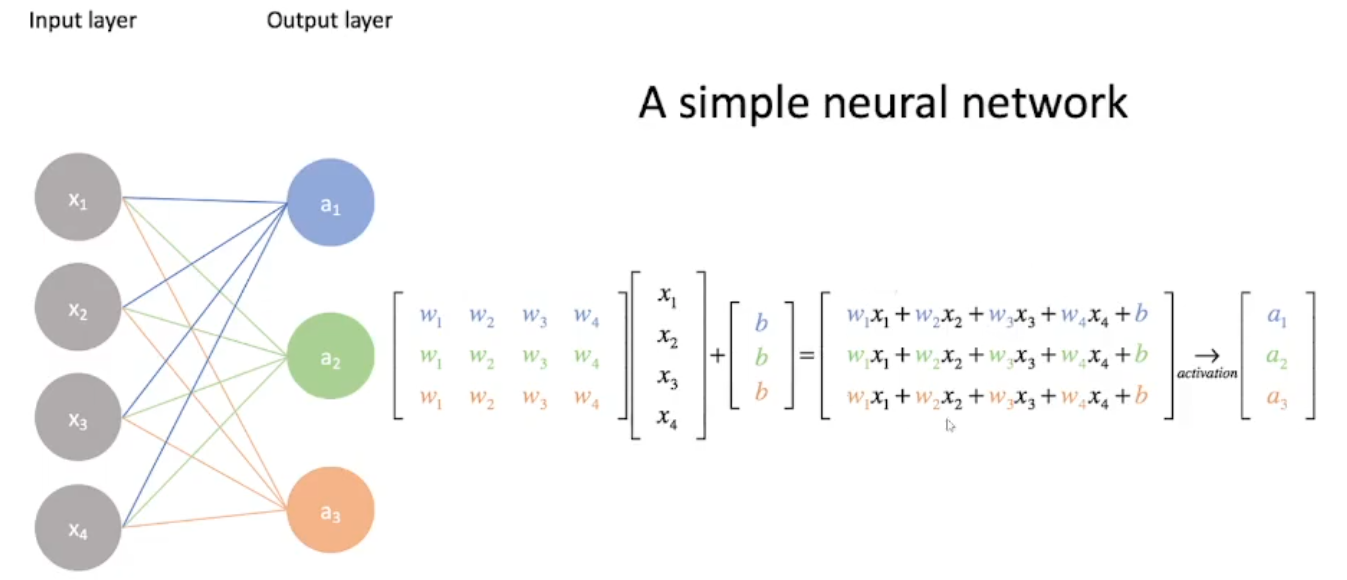

In [22]:
input = torch.ones(2, 3, 4)

linear = nn.Linear(4, 2)
linear_output = linear(input)
linear_output

tensor([[[ 0.2515, -0.4035],
         [ 0.2515, -0.4035],
         [ 0.2515, -0.4035]],

        [[ 0.2515, -0.4035],
         [ 0.2515, -0.4035],
         [ 0.2515, -0.4035]]], grad_fn=<ViewBackward0>)

In [23]:
linear_output.shape

torch.Size([2, 3, 2])

In [24]:
list(linear.parameters())

[Parameter containing:
 tensor([[ 0.2135,  0.1484, -0.2887,  0.3250],
         [ 0.1959,  0.1382, -0.1492, -0.0998]], requires_grad=True),
 Parameter containing:
 tensor([-0.1467, -0.4886], requires_grad=True)]

In [25]:
linear_output

tensor([[[ 0.2515, -0.4035],
         [ 0.2515, -0.4035],
         [ 0.2515, -0.4035]],

        [[ 0.2515, -0.4035],
         [ 0.2515, -0.4035],
         [ 0.2515, -0.4035]]], grad_fn=<ViewBackward0>)

In [26]:
sigmoid = nn.Sigmoid()
output = sigmoid(linear_output)
output

tensor([[[0.5626, 0.4005],
         [0.5626, 0.4005],
         [0.5626, 0.4005]],

        [[0.5626, 0.4005],
         [0.5626, 0.4005],
         [0.5626, 0.4005]]], grad_fn=<SigmoidBackward0>)

In [28]:
block = nn.Sequential(
    nn.Linear(4, 2),
    nn.Sigmoid()
)

input = torch.ones(2, 3, 4)
output = block(input)
output

tensor([[[0.5059, 0.3697],
         [0.5059, 0.3697],
         [0.5059, 0.3697]],

        [[0.5059, 0.3697],
         [0.5059, 0.3697],
         [0.5059, 0.3697]]], grad_fn=<SigmoidBackward0>)

In [33]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, input_size, hidden_size):
        super().__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size

        self.model = nn.Sequential(
            nn.Linear(self.input_size, self.hidden_size),
            nn.ReLU(),
            nn.Linear(self.hidden_size, self.input_size),
            nn.Sigmoid()
        )

    def forward(self, x):
        output = self.model(x)
        return output

In [34]:
input = torch.randn(2, 5)
model = MultilayerPerceptron(5, 3)
model(input)

tensor([[0.4744, 0.4743, 0.5516, 0.6233, 0.3429],
        [0.5493, 0.5459, 0.5187, 0.5614, 0.4030]], grad_fn=<SigmoidBackward0>)

In [35]:
import torch.optim as optim

In [36]:
y = torch.ones(10 , 5)

x = y + torch.rand_like(y)
x

tensor([[1.5789, 1.2751, 1.0102, 1.4640, 1.4667],
        [1.3834, 1.3583, 1.8496, 1.9325, 1.4480],
        [1.9544, 1.8666, 1.4879, 1.9654, 1.2215],
        [1.9825, 1.4604, 1.3170, 1.7596, 1.0376],
        [1.2647, 1.2882, 1.9315, 1.3452, 1.3223],
        [1.1478, 1.1166, 1.4177, 1.8250, 1.1147],
        [1.7597, 1.0879, 1.8793, 1.0031, 1.6142],
        [1.2514, 1.3156, 1.4679, 1.9262, 1.4827],
        [1.2363, 1.7257, 1.0676, 1.1130, 1.4845],
        [1.2352, 1.1993, 1.3243, 1.0165, 1.1732]])

In [41]:
model = MultilayerPerceptron(5, 3)
adam = optim.Adam(model.parameters(), lr=1e-1)

loss_function =  nn.MSELoss()
y_pred = model(x)
loss_function(y_pred, y).item()

0.23787403106689453

In [42]:
n_epoch = 10
for epoch in range(n_epoch):
    adam.zero_grad()
    y_pred = model(x)
    loss = loss_function(y_pred, y)
    print(f'Epoch {epoch} traing loss: {loss}')
    loss.backward()
    adam.step()

Epoch 0 traing loss: 0.23787403106689453
Epoch 1 traing loss: 0.17689064145088196
Epoch 2 traing loss: 0.137578547000885
Epoch 3 traing loss: 0.10266456753015518
Epoch 4 traing loss: 0.07093798369169235
Epoch 5 traing loss: 0.04541663080453873
Epoch 6 traing loss: 0.02639564499258995
Epoch 7 traing loss: 0.013473417609930038
Epoch 8 traing loss: 0.005949242506176233
Epoch 9 traing loss: 0.0023152290377765894


In [43]:
y_predd = model(x)
y_pred

tensor([[0.9093, 0.9955, 0.9322, 0.9810, 0.9922],
        [0.9273, 0.9983, 0.9484, 0.9895, 0.9969],
        [0.9276, 0.9984, 0.9487, 0.9897, 0.9969],
        [0.9162, 0.9969, 0.9385, 0.9847, 0.9943],
        [0.9163, 0.9969, 0.9386, 0.9847, 0.9944],
        [0.9131, 0.9963, 0.9357, 0.9831, 0.9934],
        [0.9131, 0.9963, 0.9357, 0.9831, 0.9934],
        [0.9224, 0.9978, 0.9442, 0.9876, 0.9959],
        [0.9078, 0.9952, 0.9308, 0.9801, 0.9916],
        [0.8987, 0.9926, 0.9222, 0.9743, 0.9875]], grad_fn=<SigmoidBackward0>)

In [44]:
x2 = y + torch.rand_like(y)
y_pred = model(x2)
y_pred

tensor([[0.9454, 0.9980, 0.9598, 0.9900, 0.9964],
        [0.9514, 0.9987, 0.9650, 0.9924, 0.9976],
        [0.9566, 0.9991, 0.9693, 0.9940, 0.9983],
        [0.9498, 0.9985, 0.9636, 0.9917, 0.9973],
        [0.9590, 0.9993, 0.9713, 0.9948, 0.9986],
        [0.9517, 0.9987, 0.9652, 0.9925, 0.9976],
        [0.9528, 0.9988, 0.9661, 0.9928, 0.9978],
        [0.9561, 0.9991, 0.9689, 0.9939, 0.9983],
        [0.9457, 0.9980, 0.9601, 0.9902, 0.9965],
        [0.9495, 0.9985, 0.9633, 0.9916, 0.9972]], grad_fn=<SigmoidBackward0>)

In [45]:
corpus = [
    'We always come to Paris',
    'The professor is from Australia',
    'I live in Stanford',
    'He comes from Taiwan',
    'The capital of Turkey is Ankara',
    'I like icecream',
    'The wind is strong today',
    'Silly Sally sells sea shells'
]

In [46]:
def preprocess_sentence(sentence):
    return sentence.lower().split()
train_sentences = [preprocess_sentence(sent) for sent in corpus]
train_sentences

[['we', 'always', 'come', 'to', 'paris'],
 ['the', 'professor', 'is', 'from', 'australia'],
 ['i', 'live', 'in', 'stanford'],
 ['he', 'comes', 'from', 'taiwan'],
 ['the', 'capital', 'of', 'turkey', 'is', 'ankara'],
 ['i', 'like', 'icecream'],
 ['the', 'wind', 'is', 'strong', 'today'],
 ['silly', 'sally', 'sells', 'sea', 'shells']]

In [47]:
locations = set(['australia', 'ankara', 'paris', 'stanford', 'taiwan', 'turkey'])
train_labels = [[1 if word in locations else 0 for word in sent] for sent in train_sentences]
print(train_labels)
train_labels = [max(sent) for sent in train_labels]
train_labels

[[0, 0, 0, 0, 1], [0, 0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1], [0, 0, 0, 1, 0, 1], [0, 0, 0], [0, 0, 0, 0, 0], [0, 0, 0, 0, 0]]


[1, 1, 1, 1, 1, 0, 0, 0]

In [48]:
vocabulary = set(w for s in train_sentences for w in s)
vocabulary

{'always',
 'ankara',
 'australia',
 'capital',
 'come',
 'comes',
 'from',
 'he',
 'i',
 'icecream',
 'in',
 'is',
 'like',
 'live',
 'of',
 'paris',
 'professor',
 'sally',
 'sea',
 'sells',
 'shells',
 'silly',
 'stanford',
 'strong',
 'taiwan',
 'the',
 'to',
 'today',
 'turkey',
 'we',
 'wind'}

In [49]:
vocabulary.add('<unk>')
vocabulary

{'<unk>',
 'always',
 'ankara',
 'australia',
 'capital',
 'come',
 'comes',
 'from',
 'he',
 'i',
 'icecream',
 'in',
 'is',
 'like',
 'live',
 'of',
 'paris',
 'professor',
 'sally',
 'sea',
 'sells',
 'shells',
 'silly',
 'stanford',
 'strong',
 'taiwan',
 'the',
 'to',
 'today',
 'turkey',
 'we',
 'wind'}

In [50]:
vocabulary.add('<pad>')
def pad_window(sentence, window_size, pad_token='<pad>'):
    window = [pad_token] * window_size
    return window + sentence + window

window_size = 2
pad_window(train_sentences[0], window_size=window_size)


['<pad>', '<pad>', 'we', 'always', 'come', 'to', 'paris', '<pad>', '<pad>']